# LICENSE PLATE DETECTION

# Prepare image to ocr

In [4]:
import cv2 as cv
from matplotlib import pyplot as plt

In [218]:
def grayscale(image):
    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)

def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv.erode(image, kernel, iterations=1)
    image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)
    image = cv.medianBlur(image, 3)
    return (image)

def thin_font(image):
    import numpy as np
    image = cv.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv.erode(image, kernel, iterations=1)
    image = cv.bitwise_not(image)
    return (image)

def thick_font(image):
    import numpy as np
    image = cv.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv.dilate(image, kernel, iterations=1)
    image = cv.bitwise_not(image)
    return (image)

def remove_borders(image):
    contours, heiarchy = cv.findContours(image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

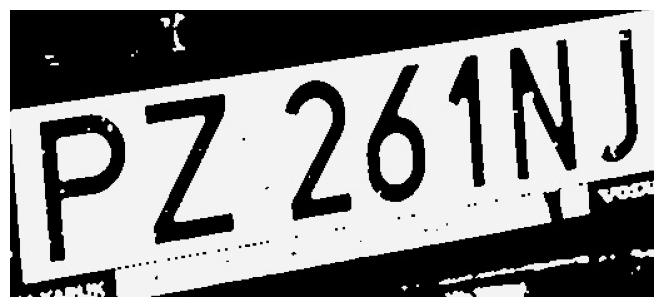

In [231]:
image_file = './img/img00.png'
img = cv.imread(image_file)
gray_image = grayscale(img)
thresh, im_bw = cv.threshold(gray_image, 100, 150, cv.THRESH_BINARY)
no_noise = noise_removal(im_bw)
# eroded_image = thin_font(no_noise)
# dilated_image = thick_font(eroded_image)
no_borders = remove_borders(no_noise)
cv.imwrite("temp/no_borders.jpg", no_borders)
display('temp/no_borders.jpg')

In [169]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

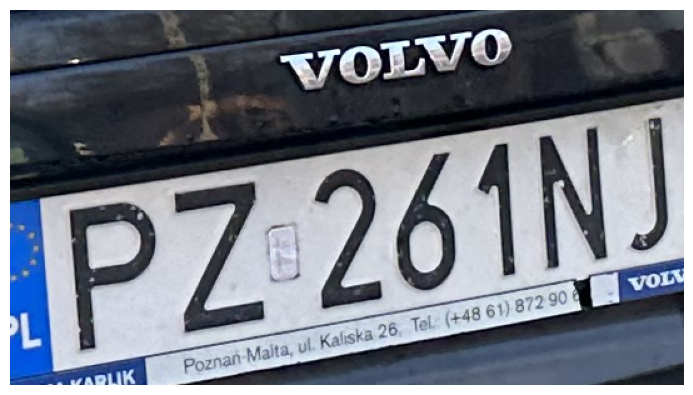

In [170]:
display(image_file)

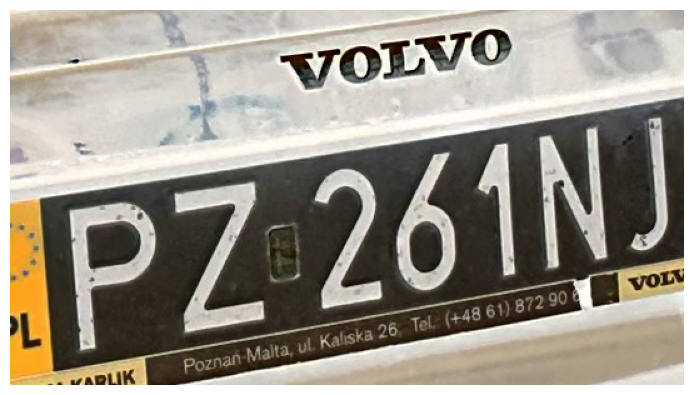

In [171]:
inverted_image = cv.bitwise_not(img)
cv.imwrite("temp/inverted.jpg", inverted_image)
display("temp/inverted.jpg")

In [172]:
def grayscale(image):
    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [203]:
gray_image = grayscale(img)
cv.imwrite("temp/gray.jpg", gray_image)

True

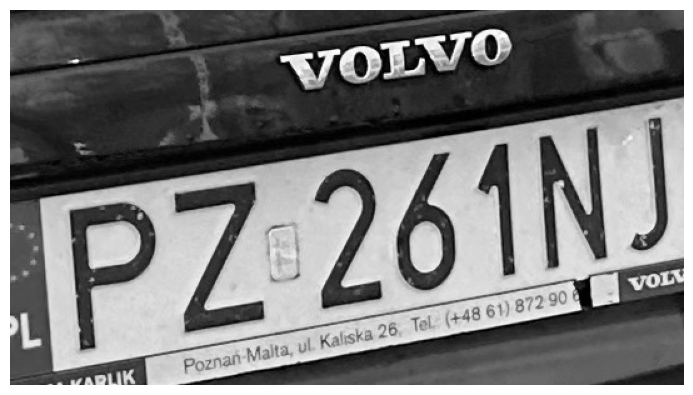

In [204]:
display("temp/gray.jpg")

In [254]:
thresh, im_bw = cv.threshold(gray_image, 170, 210, cv.THRESH_BINARY)
cv.imwrite("temp/bw_image.jpg", im_bw)

True

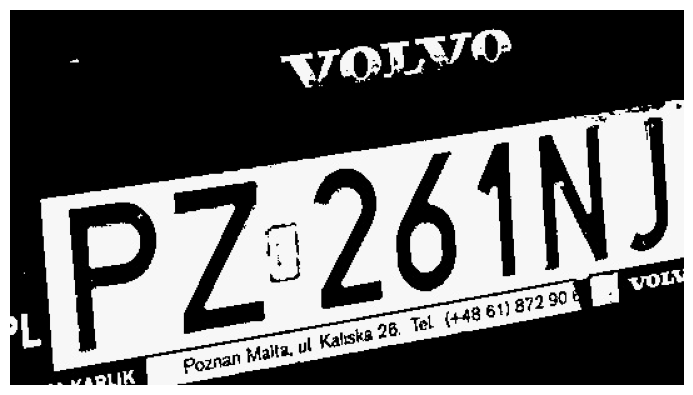

In [255]:
display("temp/bw_image.jpg")

In [207]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv.erode(image, kernel, iterations=1)
    image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)
    image = cv.medianBlur(image, 3)
    return (image)

In [208]:
no_noise = noise_removal(im_bw)
cv.imwrite("temp/no_noise.jpg", no_noise)

True

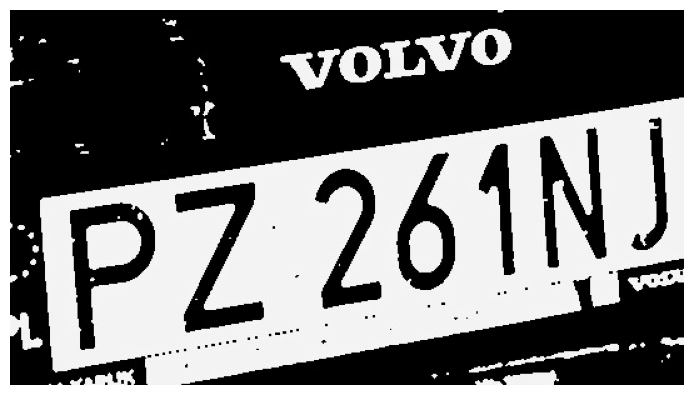

In [209]:
display("temp/no_noise.jpg")

In [210]:
def thin_font(image):
    import numpy as np
    image = cv.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv.erode(image, kernel, iterations=1)
    image = cv.bitwise_not(image)
    return (image)

In [ ]:
eroded_image = thin_font(no_noise)
cv.imwrite("temp/eroded_image.jpg", eroded_image)

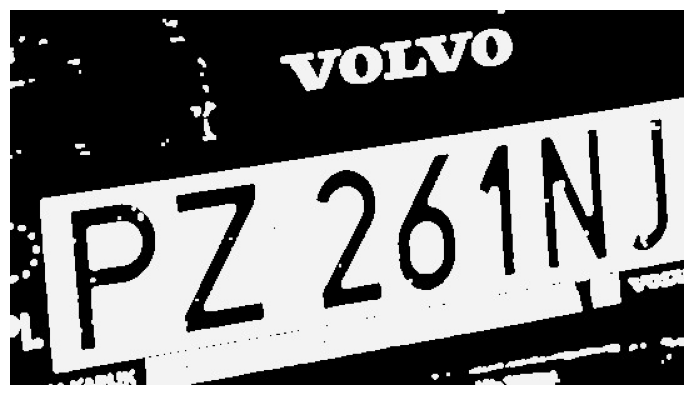

In [212]:
display("temp/eroded_image.jpg")

In [213]:
def thick_font(image):
    import numpy as np
    image = cv.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv.dilate(image, kernel, iterations=1)
    image = cv.bitwise_not(image)
    return (image)

In [ ]:
dilated_image = thick_font(no_noise)
cv.imwrite("temp/dilated_image.jpg", dilated_image)

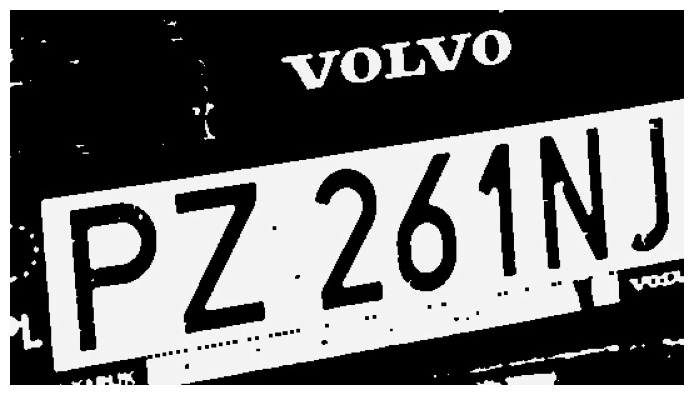

In [215]:
display("temp/dilated_image.jpg")

In [216]:
def remove_borders(image):
    contours, heiarchy = cv.findContours(image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

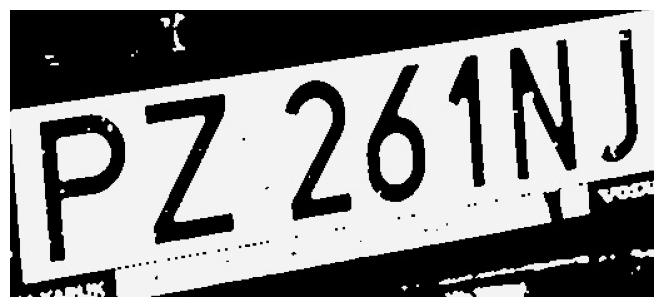

In [217]:
no_borders = remove_borders(no_noise)
cv.imwrite("temp/no_borders.jpg", no_borders)
display('temp/no_borders.jpg')